get_historical_price_data(start_date, end_date, time_interval)

This method will pull historical pricing data for stocks, currencies, ETFs, mutual funds, U.S. Treasuries, cryptocurrencies, commodities, and indexes.

- start_date should be entered in the ‘YYYY-MM-DD’ format and is the first day that data will be pulled for.
- end_date should be entered in the ‘YYYY-MM-DD’ format and is the last day that data will be pulled for.
- time_interval can be either ‘daily’, ‘weekly’, or ‘monthly’. This variable determines the time period interval for your pull.

Data response includes relevant pricing event data such as dividends and stock splits.

In [1]:
from yahoofinancials import YahooFinancials
from http.client import IncompleteRead
import pandas as pd
import csv
from time import sleep
import matplotlib.pyplot as plt
# %matplotlib notebook
from datetime import datetime

In [2]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [3]:
rankings = pd.read_csv('results/result_focus.csv', index_col=0)
rankings.head()

,DE Ratio,Current Ratio,ROI,Revenue CAGR,EPS CAGR,BVPS,FCF CAGR,Current EPS,Current PE Ratio,Points
ROVIO.HE,0.295653,3.902155,28.017911,2.136986,-0.377423,106.609396,0.886482,0.427,16.381733,778.0
TYRES.HE,0.385204,3.374576,13.996340,0.573706,0.307413,14.805591,NaN,0.620,50.048390,754.0
VINCIT.HE,0.592766,2.016996,15.015855,0.477553,0.451605,1.914747,0.855392,0.360,28.055555,742.0
REMEDY.HE,0.303180,6.639941,30.069910,-0.462298,-0.025217,80.317654,-0.356197,0.856,53.738316,701.0
ADMCM.HE,0.245613,4.046992,85.323208,-0.532693,0.043325,2.227487,-0.280302,1.362,71.732740,699.0


In [4]:
top_companies = []
for i, row in rankings.head(50).iterrows():
    print(i)
    top_companies.append(i)

ROVIO.HE
TYRES.HE
VINCIT.HE
REMEDY.HE
ADMCM.HE
VIAFIN.HE
DETEC.HE
KAMUX.HE
FONDIA.HE
APETIT.HE
SCANFL.HE
RAIKV.HE
NESTE.HE
RAP1V.HE
GOFORE.HE
ORNAV.HE
ENENTO.HE
BITTI.HE
ICP1V.HE
KNEBV.HE
ORNBV.HE
SIEVI.HE
UPM.HE
UPONOR.HE
REG1V.HE
YIT.HE
RAIVV.HE
EQV1V.HE
MEKKO.HE
FSKRS.HE
TITAN.HE
ALTIA.HE
VAIAS.HE
ACG1V.HE
KELAS.HE
LAT1V.HE
OLVAS.HE
UNIAV.HE
PARTNE1.HE
SSABBH.HE
METSA.HE
RAUTE.HE
SIILI.HE
WRT1V.HE
DOV1V.HE
RELAIS.HE
METSB.HE
CAPMAN.HE
FORTUM.HE
NELES.HE


In [5]:
def price_history(company):
    max_try = 5
    attemp = 1
    while attemp < max_try:
        try:
            yf = YahooFinancials(company)
            data = yf.get_historical_price_data('2018-04-10', '2021-04-10', 'daily')
            data_1 = data[company]['prices']
#             print(data_1)

        except IncompleteRead:
            attemp += 1
#                 sleep(10)
            if attemp == max_try:
                print(f'Failed {N}')
        except ValueError as e:
            print(f'{e}: {N}')
            attemp = max_try
        else:
            break
            
    df = pd.DataFrame.from_dict(data_1)
    df.to_csv(f"results/price_history_{company.split('.')[0]}.csv")


In [6]:
top_prices = []

for i in top_companies:
    price_history(i)    
    top_prices.append(f"results/price_history_{i.split('.')[0]}.csv")
    print(f"results/price_history_{i.split('.')[0]}.csv")

results/price_history_ROVIO.csv
results/price_history_TYRES.csv
results/price_history_VINCIT.csv
results/price_history_REMEDY.csv
results/price_history_ADMCM.csv
results/price_history_VIAFIN.csv
results/price_history_DETEC.csv
results/price_history_KAMUX.csv
results/price_history_FONDIA.csv
results/price_history_APETIT.csv
results/price_history_SCANFL.csv
results/price_history_RAIKV.csv
results/price_history_NESTE.csv
results/price_history_RAP1V.csv
results/price_history_GOFORE.csv
results/price_history_ORNAV.csv
results/price_history_ENENTO.csv
results/price_history_BITTI.csv
results/price_history_ICP1V.csv
results/price_history_KNEBV.csv
results/price_history_ORNBV.csv
results/price_history_SIEVI.csv
results/price_history_UPM.csv
results/price_history_UPONOR.csv
results/price_history_REG1V.csv
results/price_history_YIT.csv
results/price_history_RAIVV.csv
results/price_history_EQV1V.csv
results/price_history_MEKKO.csv
results/price_history_FSKRS.csv
results/price_history_TITAN.csv
res

In [7]:
df_top_companies = []
for i in top_prices:
    df = pd.read_csv(i, index_col='formatted_date')
    del df['Unnamed: 0']
    df_top_companies.append(df)

In [8]:
df_top_companies[0].head()

,date,high,low,open,close,volume,adjclose
formatted_date,,,,,,,
2018-04-10,1523343600,4.880,4.783,4.801,4.877,619064,4.536303
2018-04-11,1523430000,4.908,4.834,4.870,4.850,182531,4.511189
2018-04-12,1523516400,4.850,4.730,4.846,4.748,115481,4.416315
2018-04-13,1523602800,4.794,4.685,4.700,4.749,781811,4.417245
2018-04-16,1523862000,4.946,4.702,4.800,4.840,202574,4.501888


## Price change

In [9]:
price_change_dict = {}
for n in range(len(df_top_companies)):
    price_change = (df_top_companies[n].close.iloc[-1] / df_top_companies[n].close.iloc[0]) - 1
    price_change_dict[top_companies[n]] = price_change
df_price = pd.DataFrame.from_dict(price_change_dict, orient='index')

In [10]:
df_price.columns = ['Price Change']
df_price = df_price['Price Change'].sort_values(ascending=True)
df_price

NELES.HE     -0.557968
WRT1V.HE     -0.507650
FONDIA.HE    -0.378512
YIT.HE       -0.330267
RAUTE.HE     -0.223333
SIEVI.HE     -0.186047
LAT1V.HE     -0.125908
TYRES.HE     -0.106021
PARTNE1.HE   -0.044534
APETIT.HE    -0.036496
KELAS.HE      0.002252
UPM.HE        0.081323
SSABBH.HE     0.082920
FSKRS.HE      0.097137
METSB.HE      0.110468
BITTI.HE      0.125418
METSA.HE      0.145585
RAIKV.HE      0.158774
RAIVV.HE      0.159501
FORTUM.HE     0.298981
ENENTO.HE     0.305147
ORNAV.HE      0.315315
ALTIA.HE      0.370000
ORNBV.HE      0.403670
DETEC.HE      0.413333
UPONOR.HE     0.416426
VINCIT.HE     0.422535
ROVIO.HE      0.434283
VAIAS.HE      0.543529
DOV1V.HE      0.596000
SIILI.HE      0.616290
ACG1V.HE      0.688525
SCANFL.HE     0.728070
OLVAS.HE      0.755396
KNEBV.HE      0.772297
CAPMAN.HE     0.887324
UNIAV.HE      0.904412
TITAN.HE      1.093333
KAMUX.HE      1.142424
RAP1V.HE      1.259366
EQV1V.HE      1.343137
GOFORE.HE     1.408027
NESTE.HE      1.413020
RELAIS.HE  

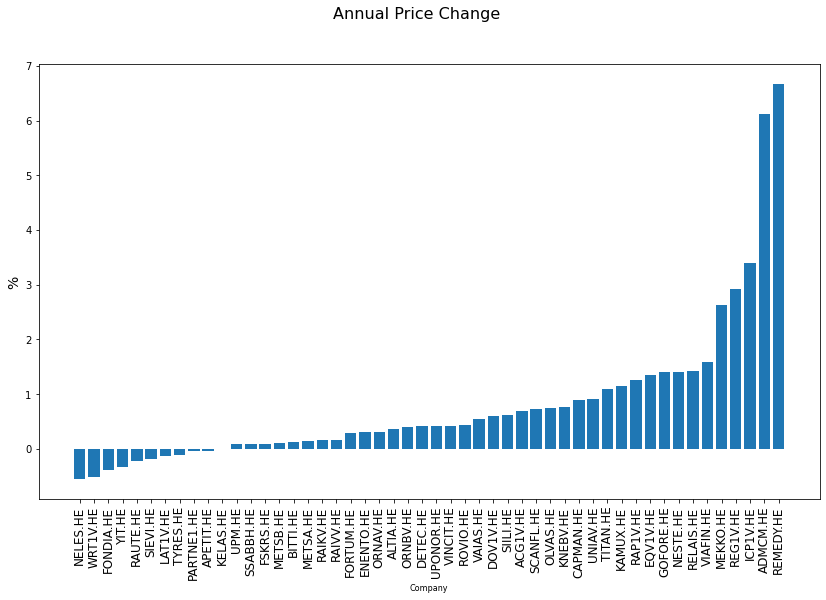

In [11]:
plt.figure(figsize=(14,8))
plt.bar(df_price.index, df_price)
plt.xticks(ticks=df_price.index, fontsize=12, rotation=90)
plt.xlabel('Company', fontsize=8)
plt.ylabel('%', fontsize=14)
plt.suptitle('3 Year Price Change', fontsize=16)
plt.show()


In [12]:
# company n 13 have insane high value for 1 day which makes my graph look awfull
for n in range(len(df_top_companies)):
    print(f"{n}:  {df_top_companies[n].close.max()}")

0:  7.800000190734862
1:  37.45000076293945
2:  10.100000381469727
3:  47.29999923706055
4:  139.5
5:  18.5
6:  29.0
7:  15.31999969482422
8:  15.199999809265135
9:  14.0
10:  7.880000114440918
11:  4.190000057220459
12:  64.18000030517578
13:  690.0
14:  23.0
15:  48.04999923706055
16:  38.599998474121094
17:  7.880000114440918
18:  26.25
19:  75.86000061035156
20:  48.54999923706055
21:  3.119999885559082
22:  34.560001373291016
23:  19.989999771118164
24:  59.9000015258789
25:  7.09499979019165
26:  4.199999809265137
27:  19.700000762939453
28:  53.599998474121094
29:  16.299999237060547
30:  16.850000381469727
31:  11.539999961853027
32:  42.599998474121094
33:  6.71999979019165
34:  5.5
35:  17.559999465942386
36:  50.0
37:  13.600000381469727
38:  2.470000028610229
39:  4.160999774932861
40:  10.050000190734863
41:  32.799999237060554
42:  18.420000076293945
43:  19.059999465942386
44:  0.4160000085830689
45:  17.899999618530273
46:  10.239999771118164
47:  2.880000114440918
48: 

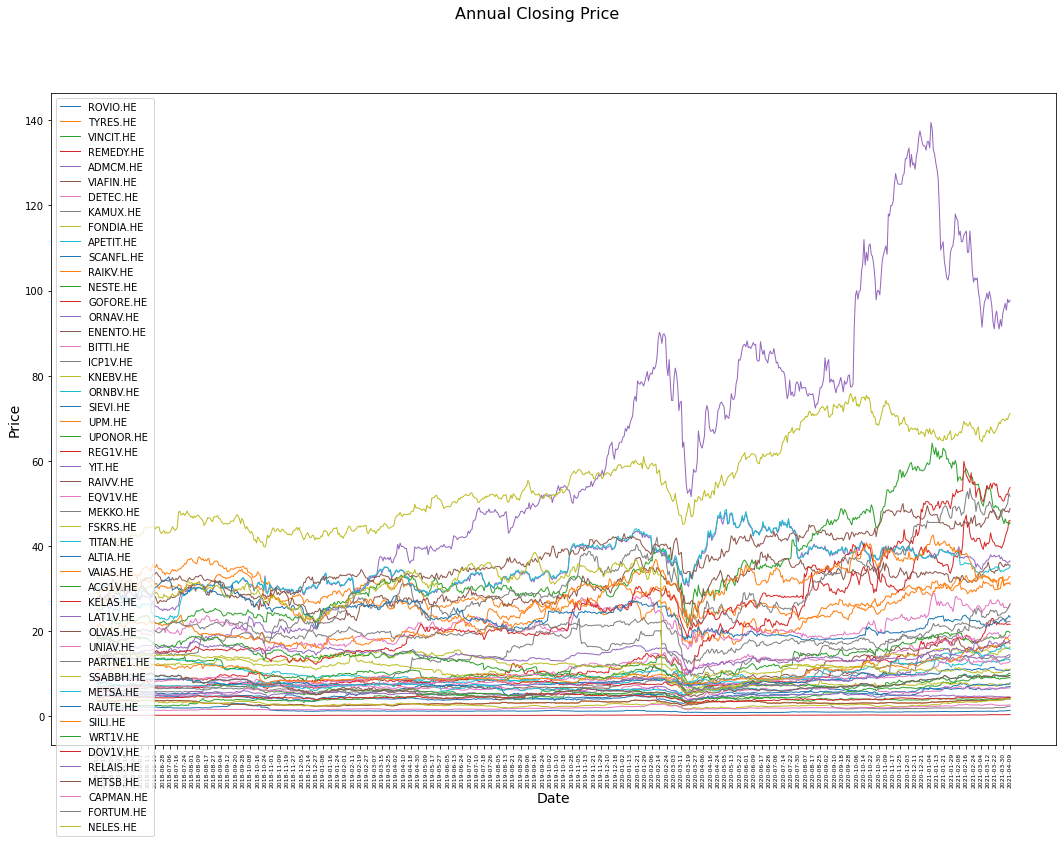

In [13]:
plt.figure(figsize=(18,12))
for n in range(len(df_top_companies)):
    # So delete it from graph for now
    if n != 13:
        plt.plot(df_top_companies[n].index, df_top_companies[n].close, label=top_companies[n], linewidth=1)
plt.xticks(ticks=df_top_companies[0].index[::6], labels=df_top_companies[0].index[::6], fontsize=6, rotation=90)
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.suptitle('3 Year Closing Price', fontsize=16)
plt.show()

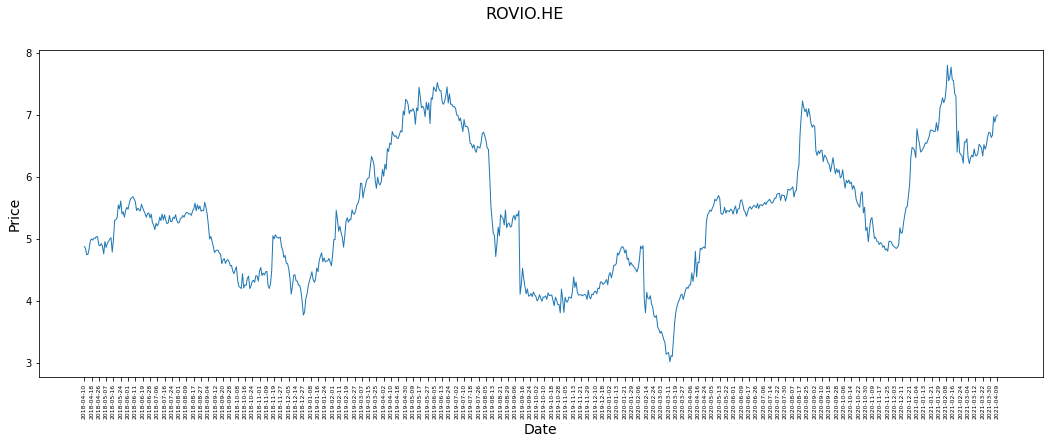

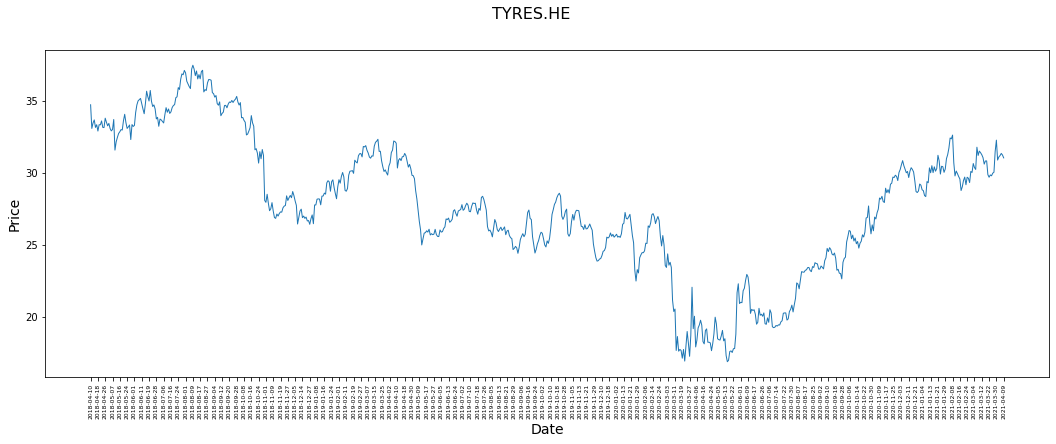

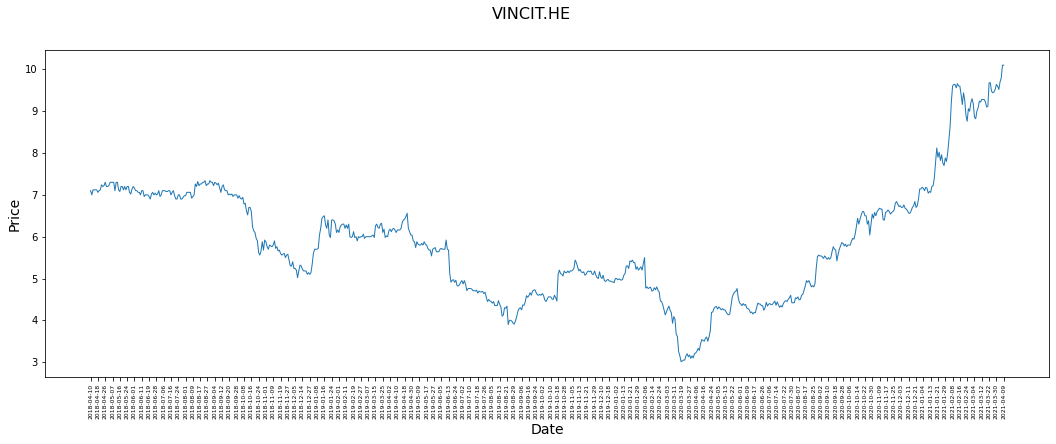

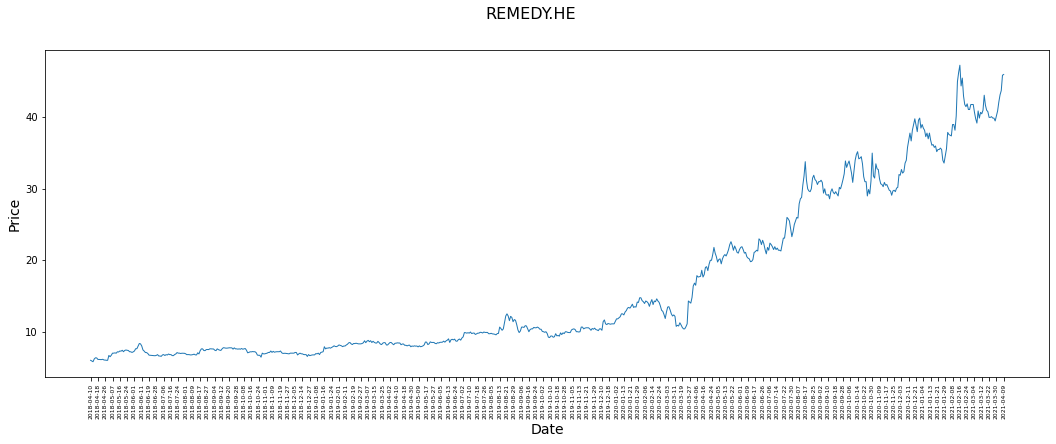

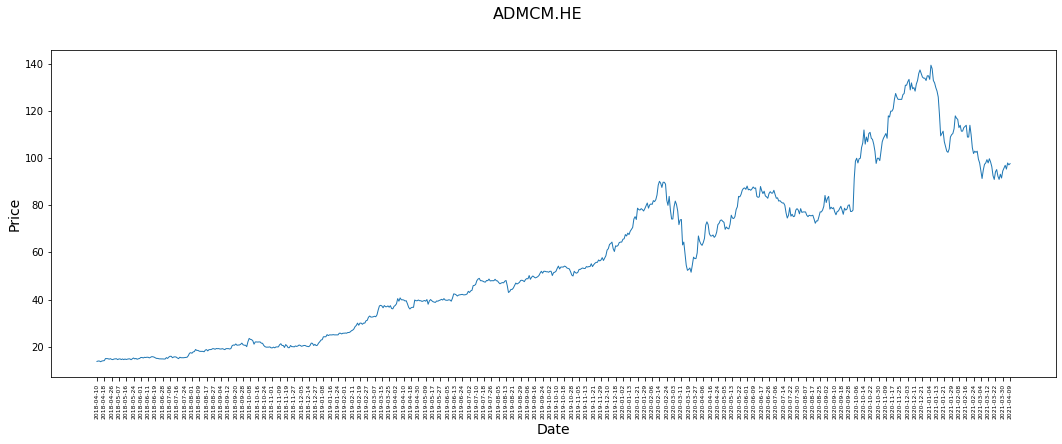

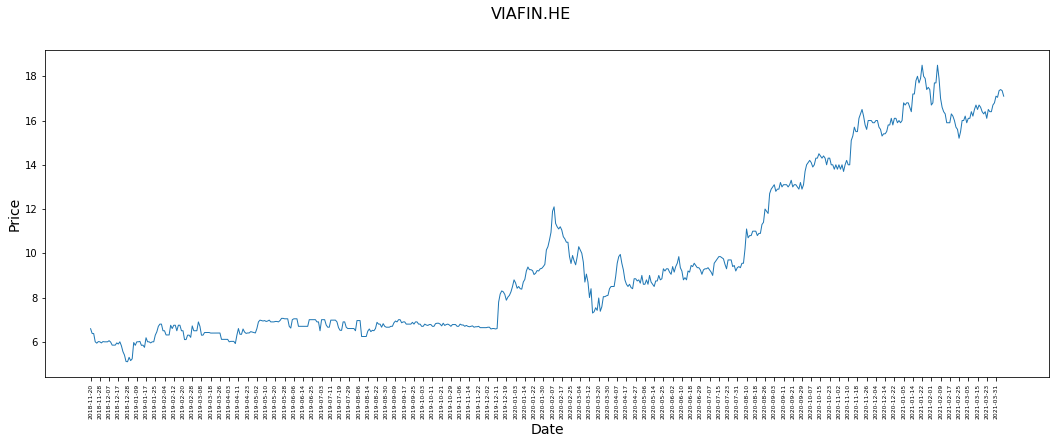

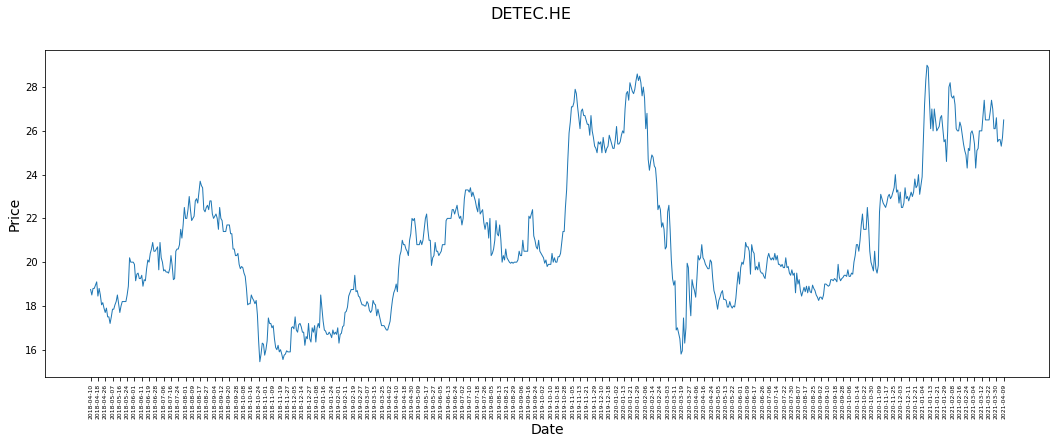

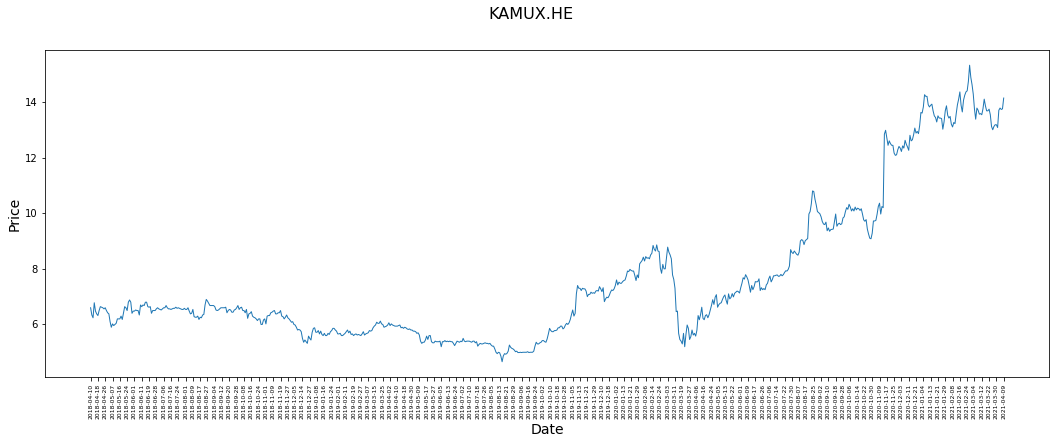

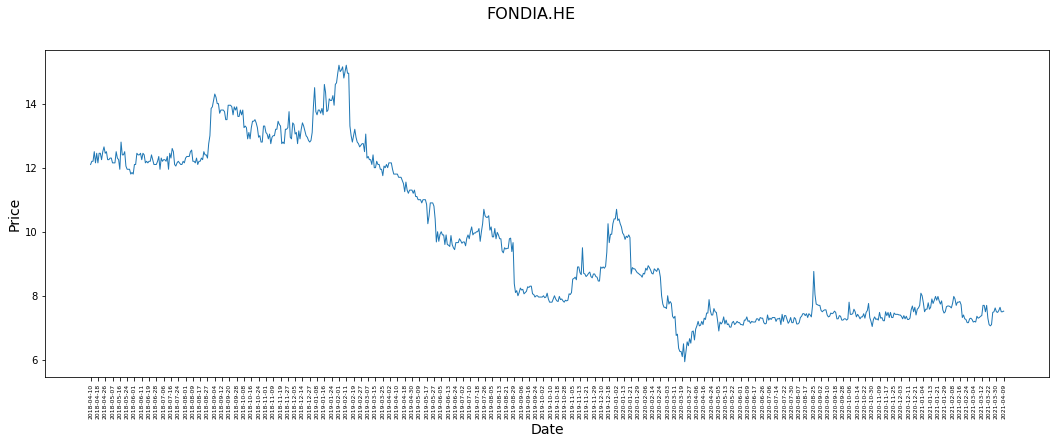

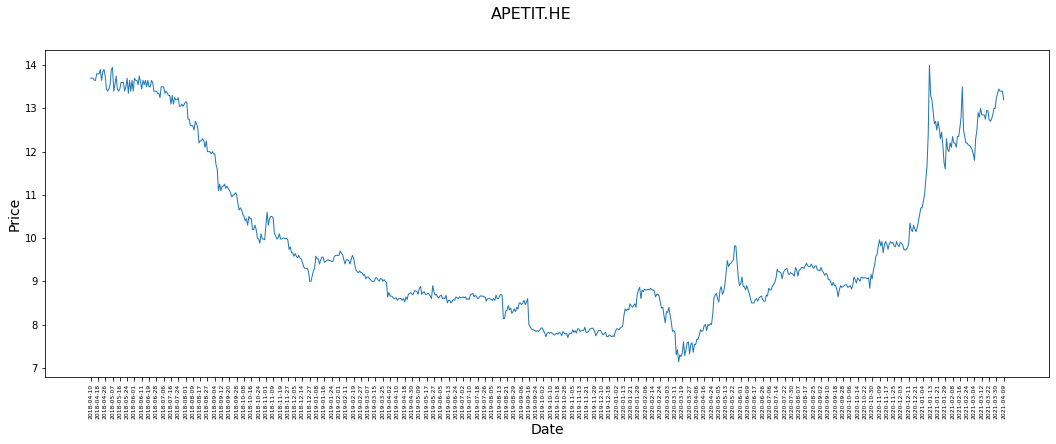

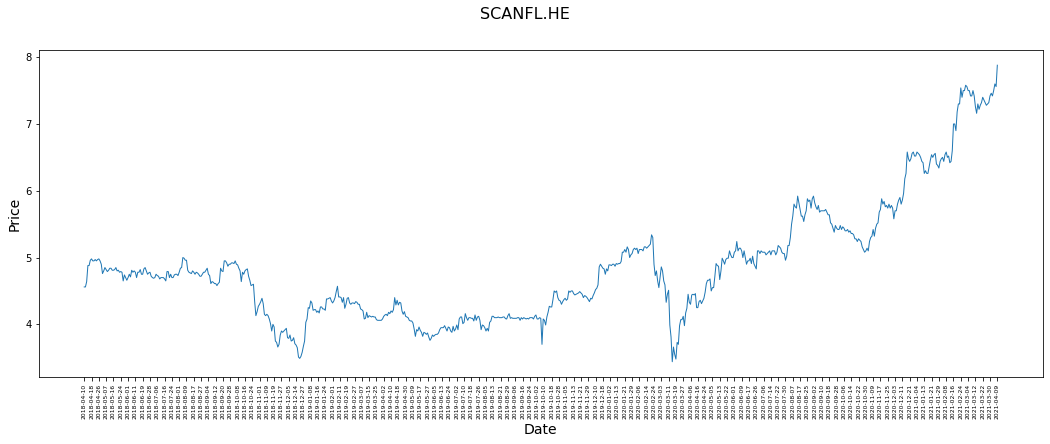

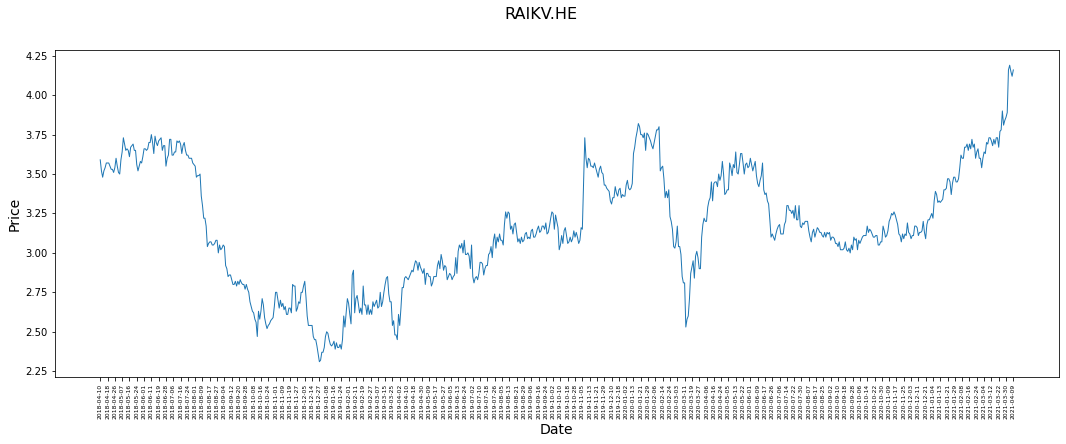

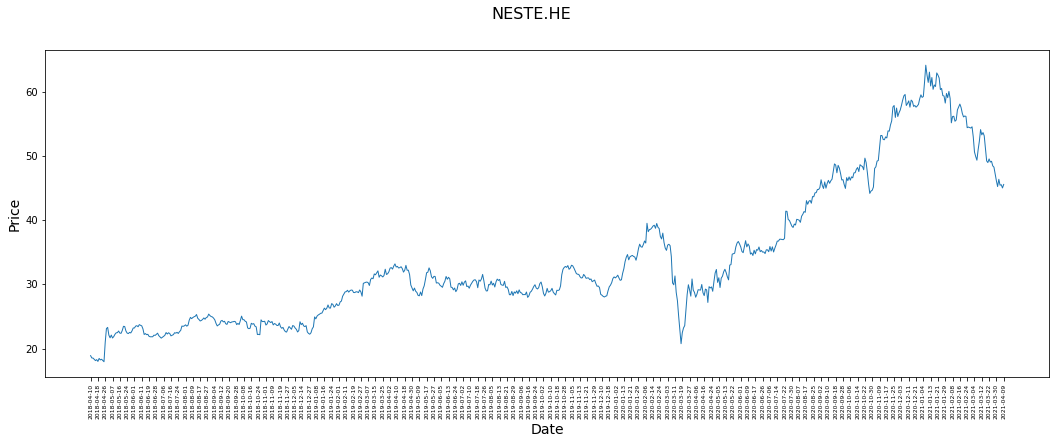

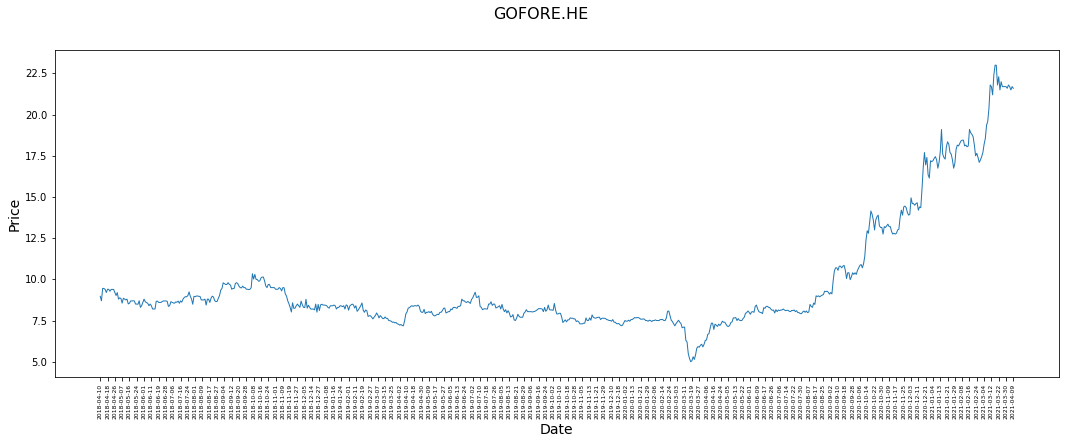

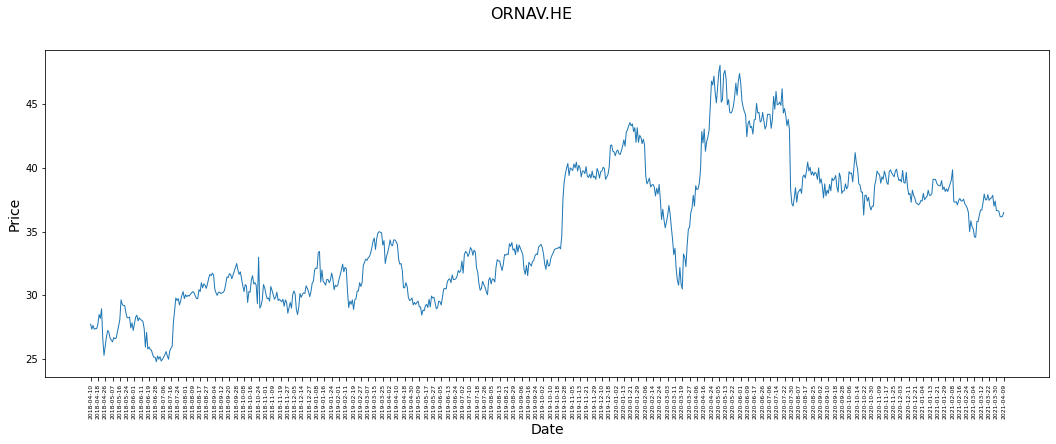

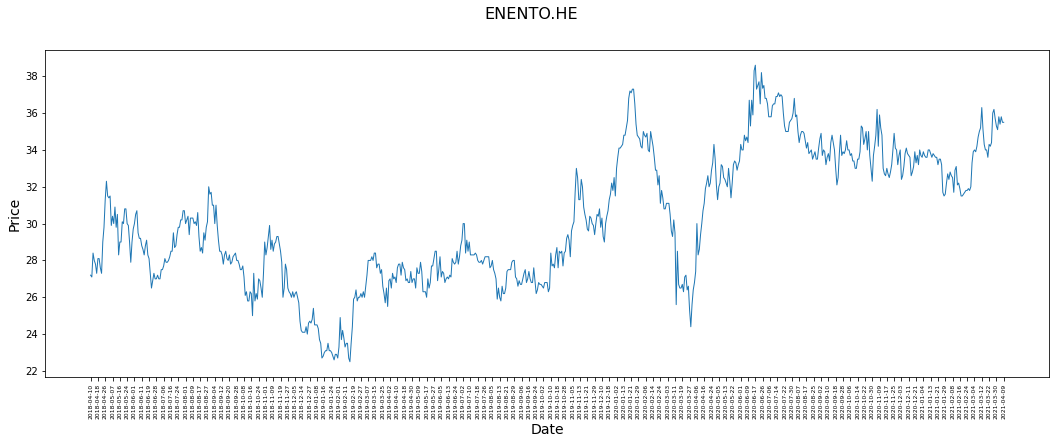

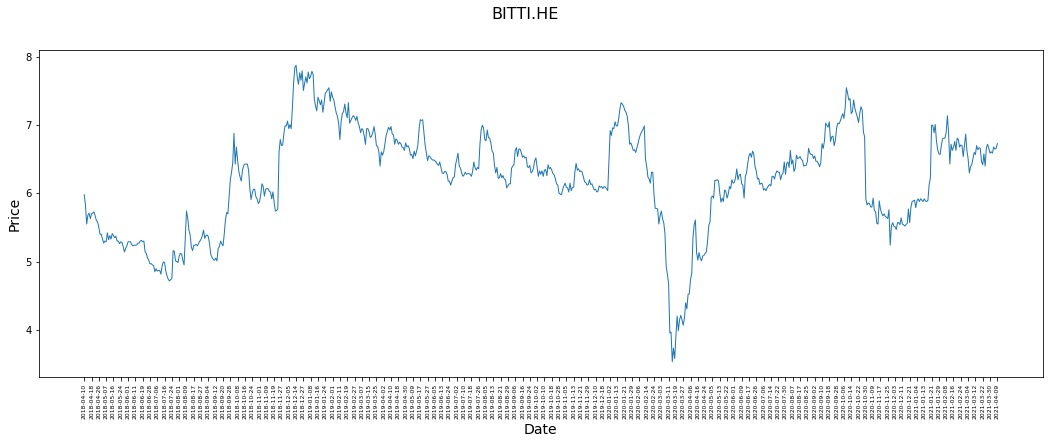

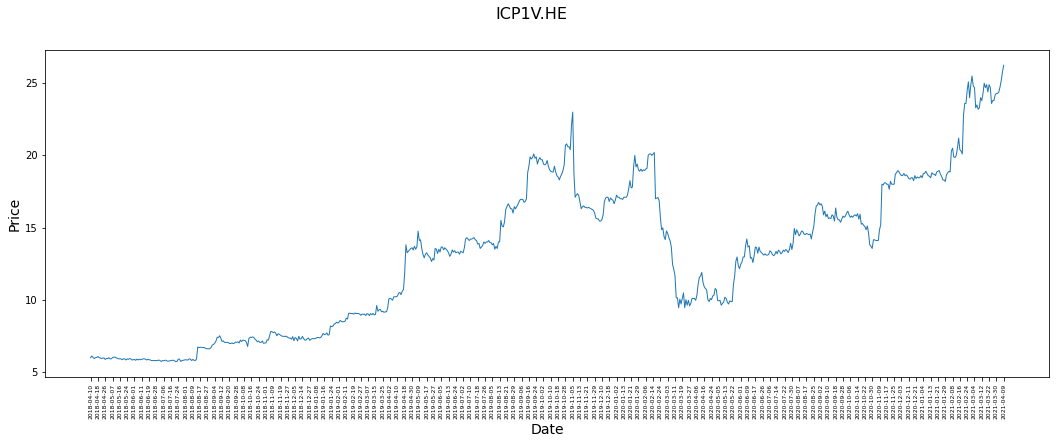

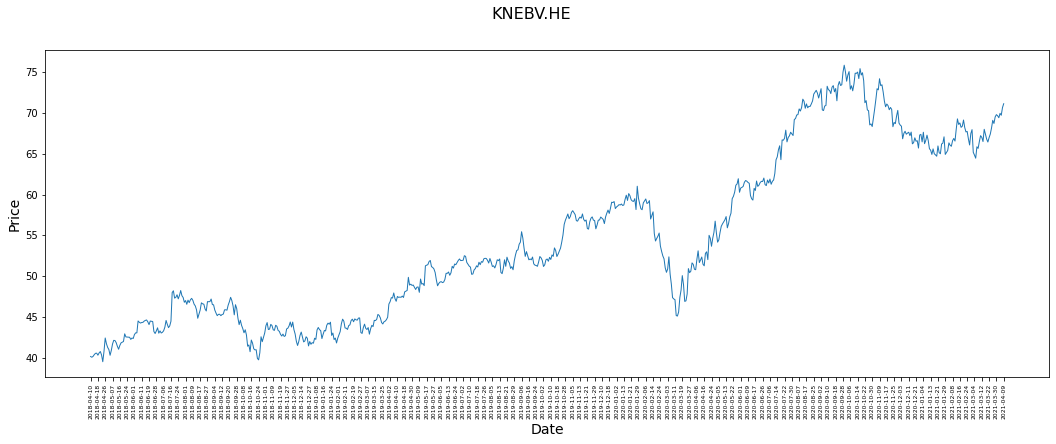

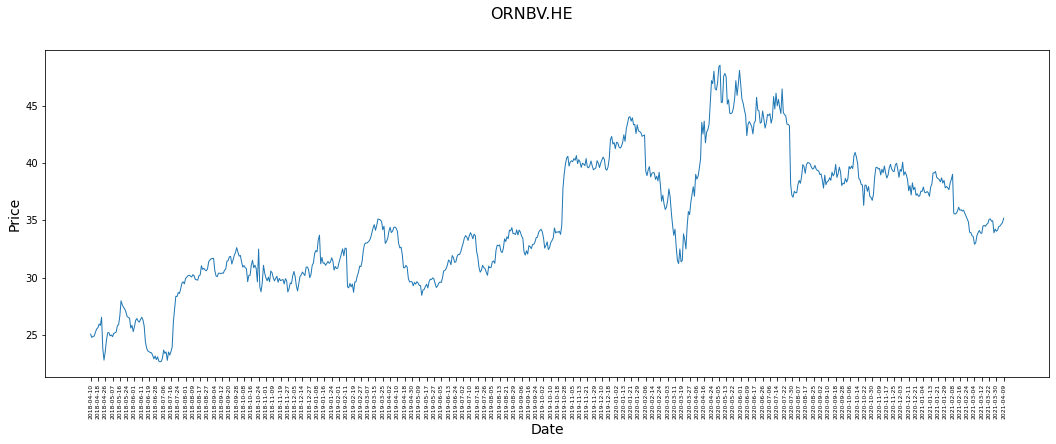

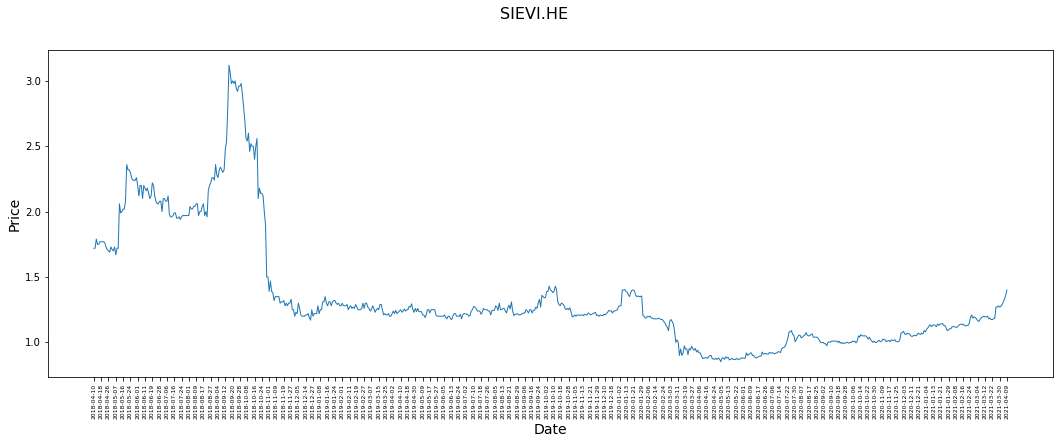

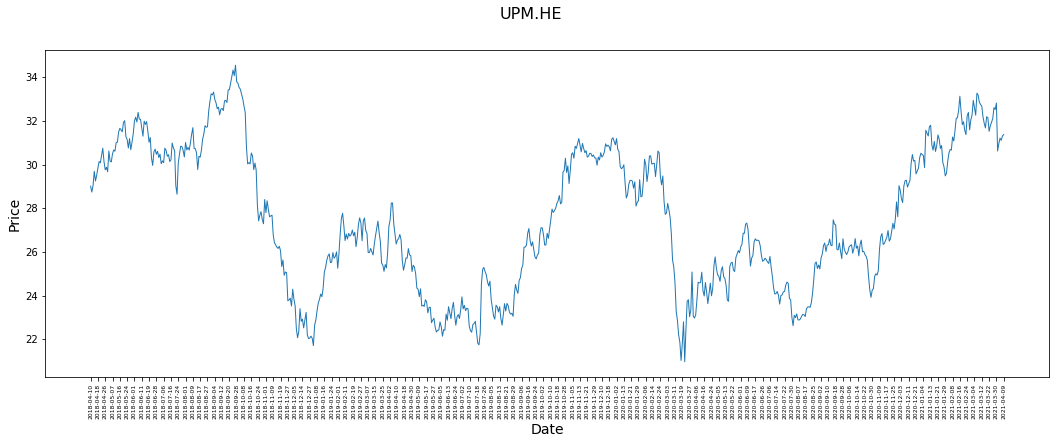

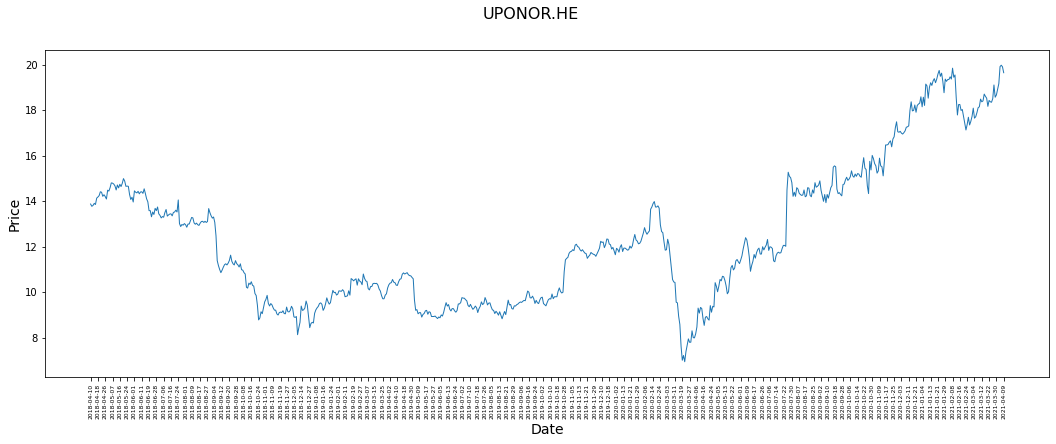

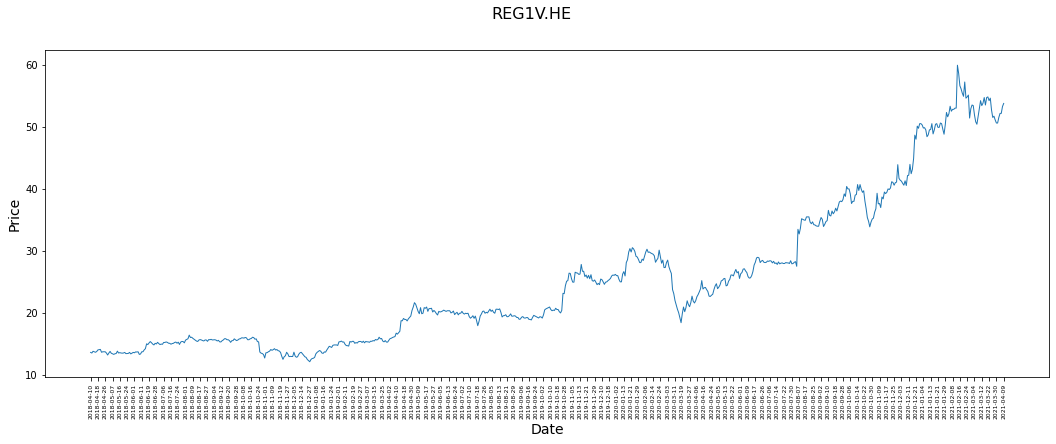

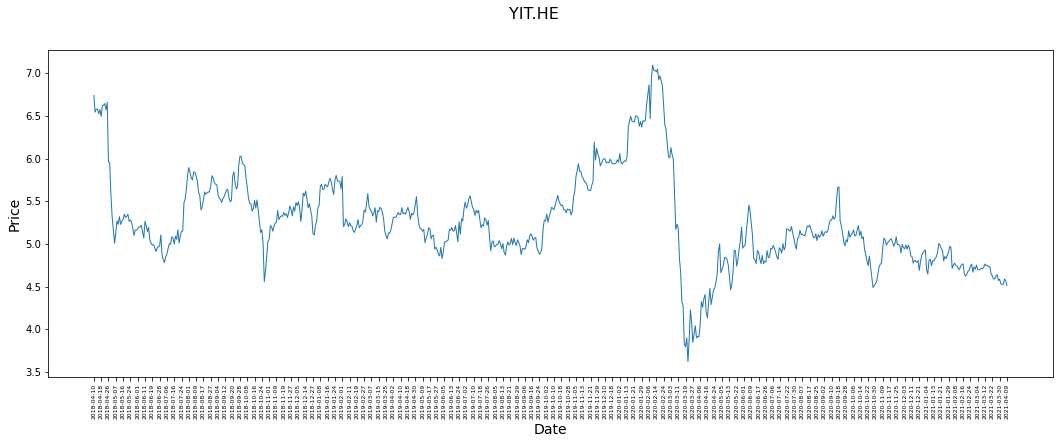

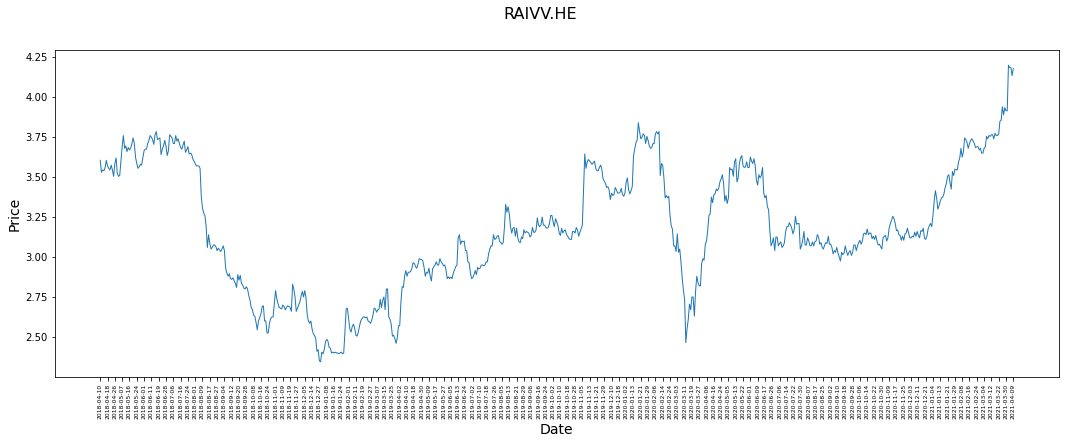

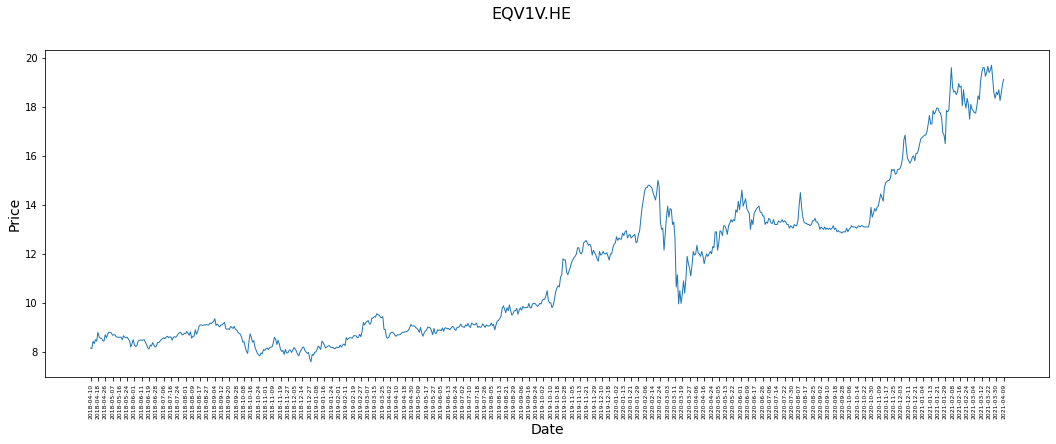

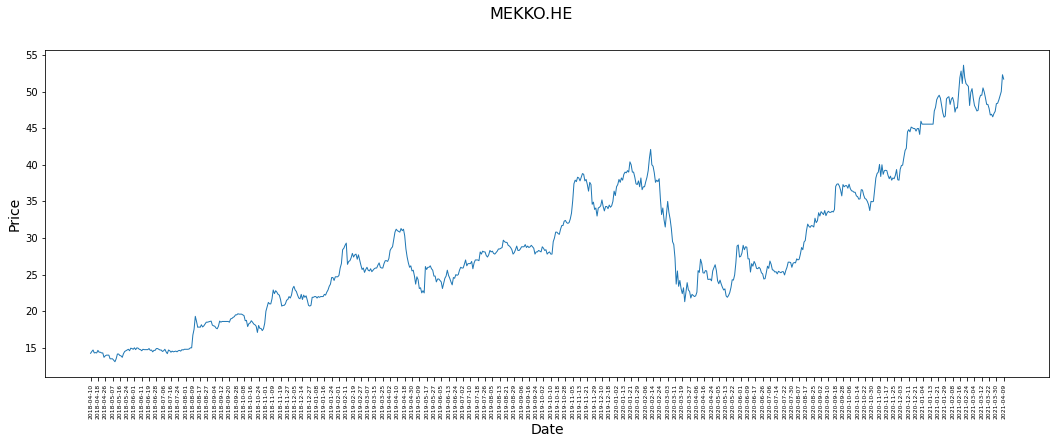

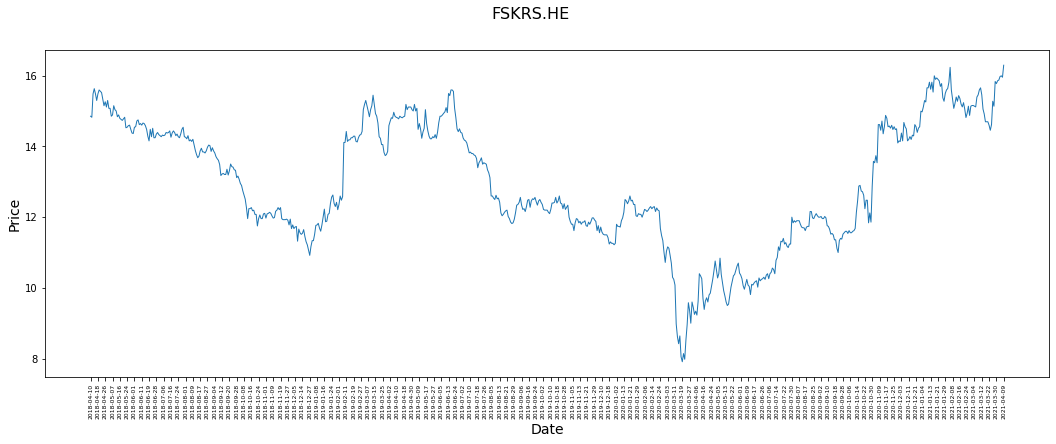

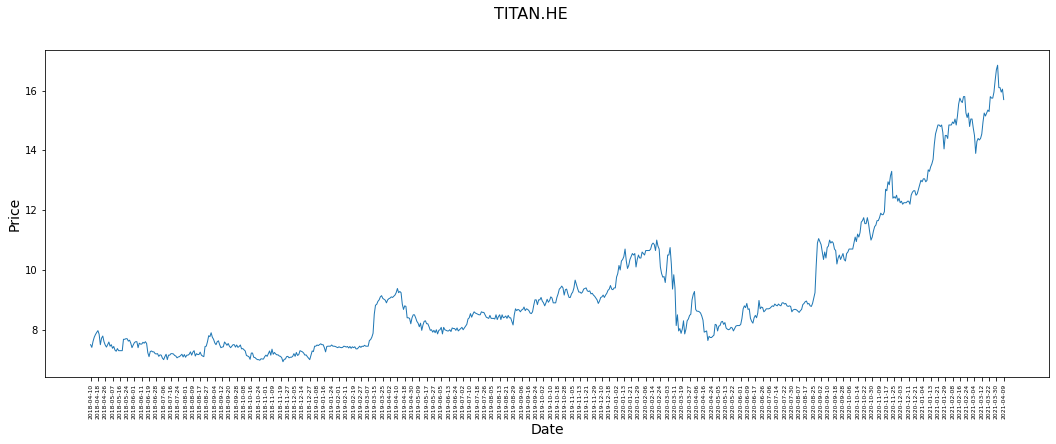

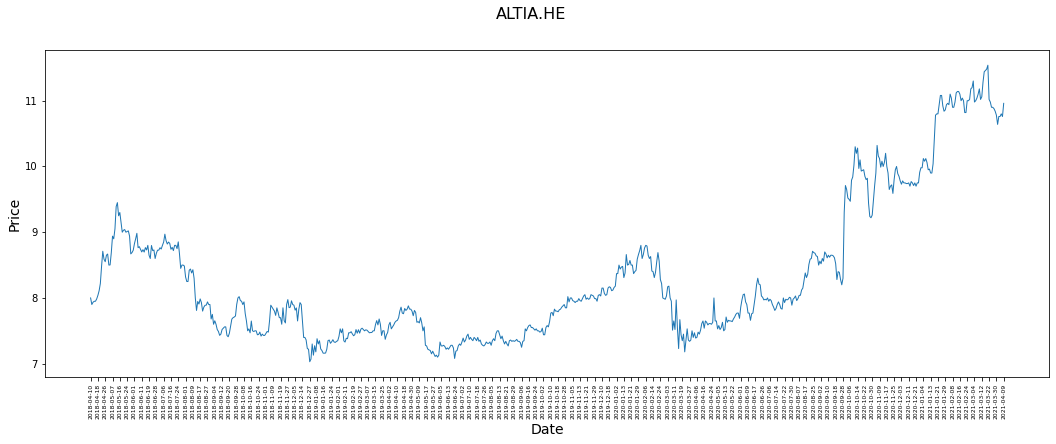

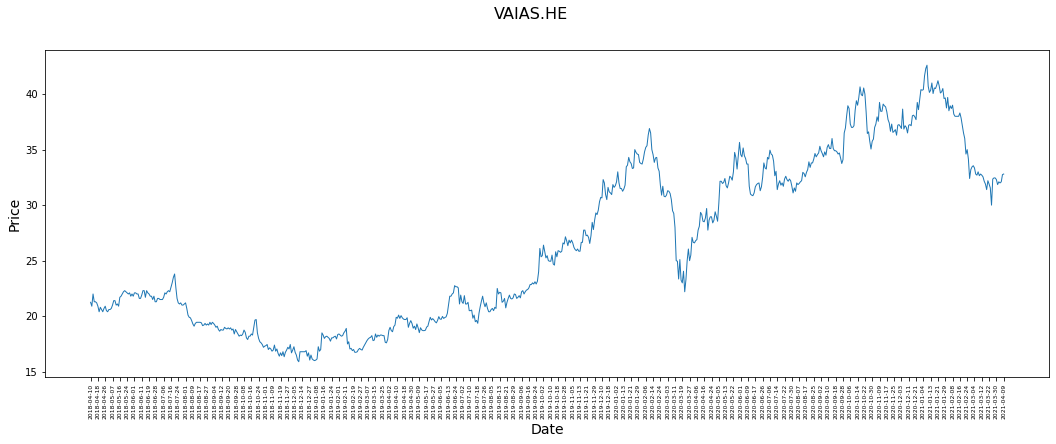

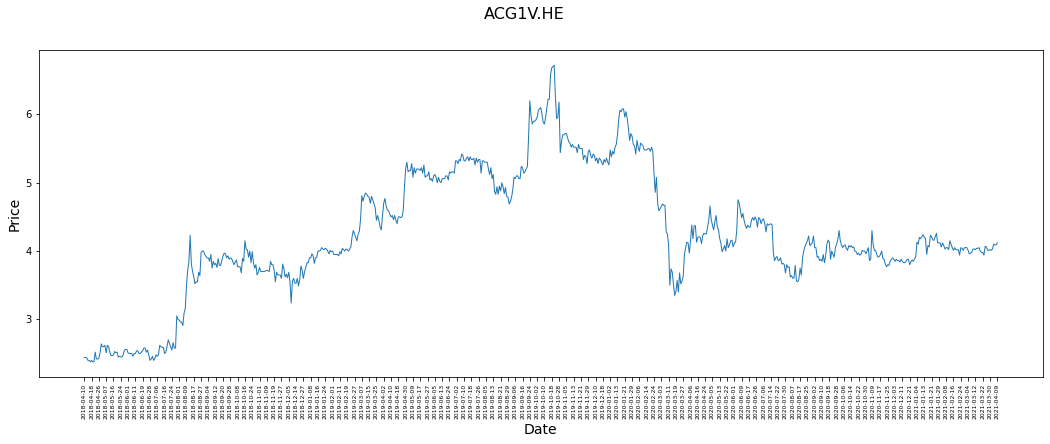

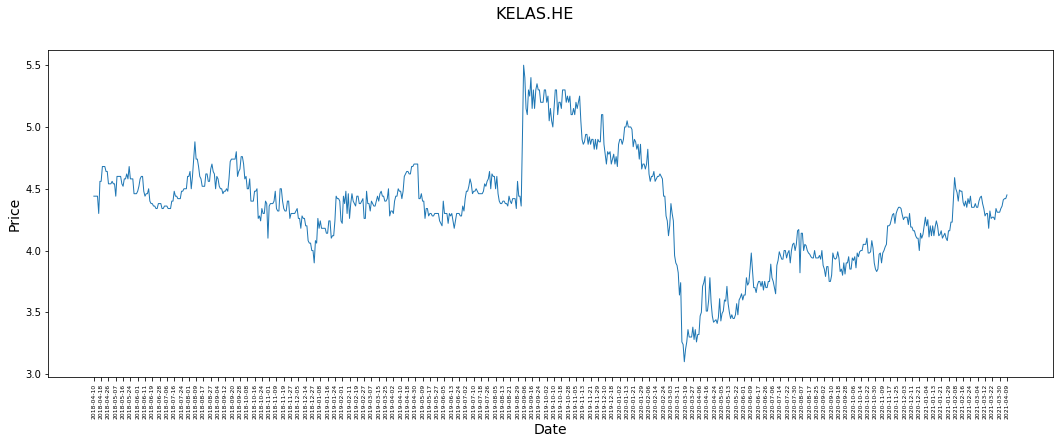

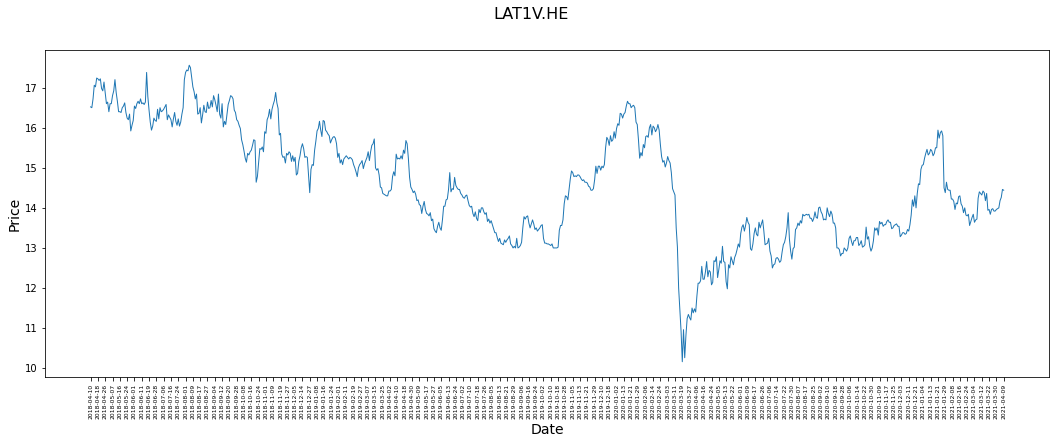

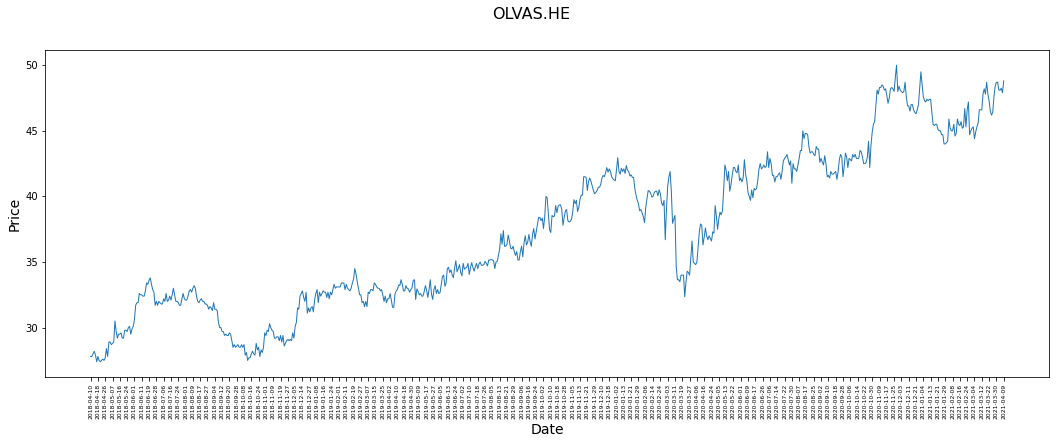

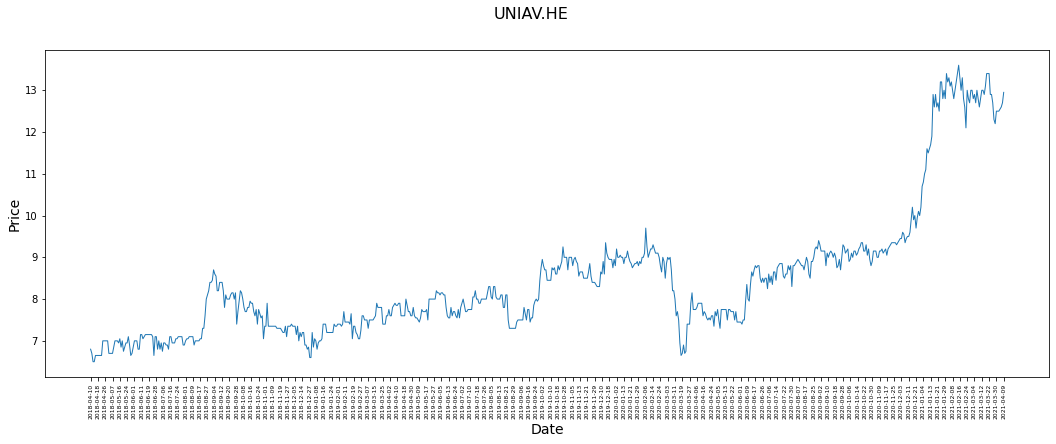

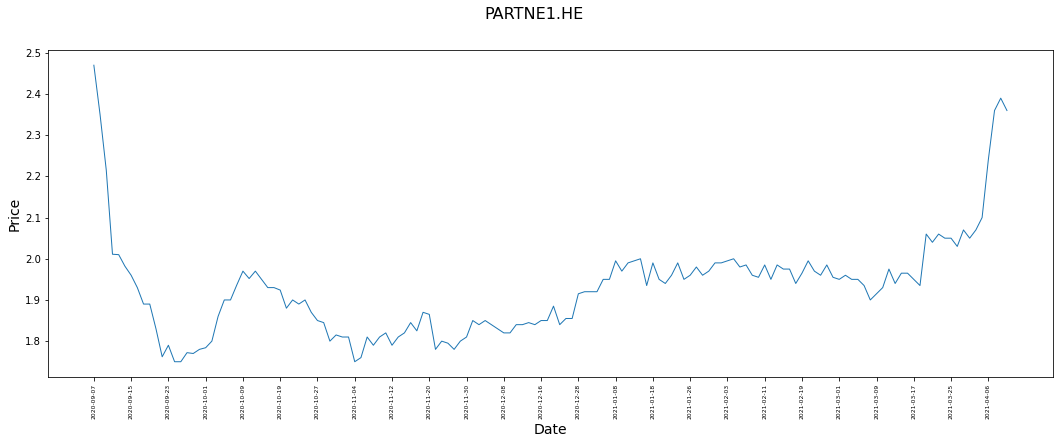

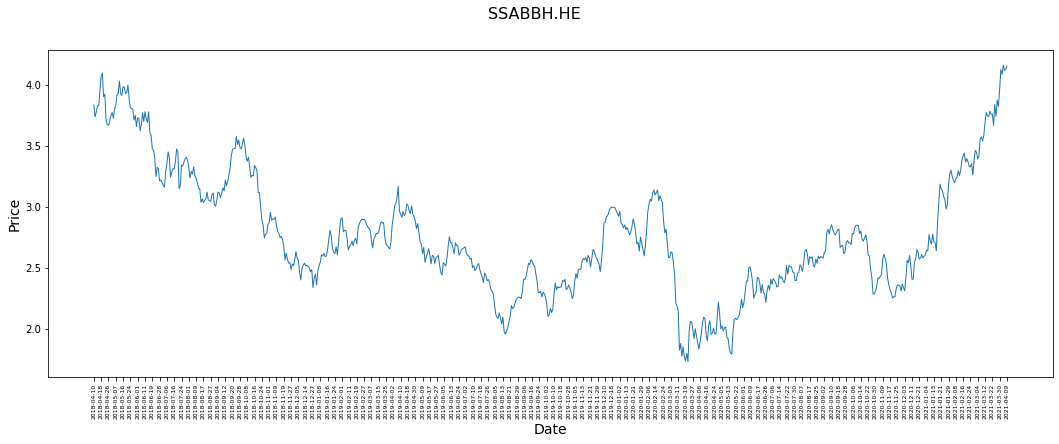

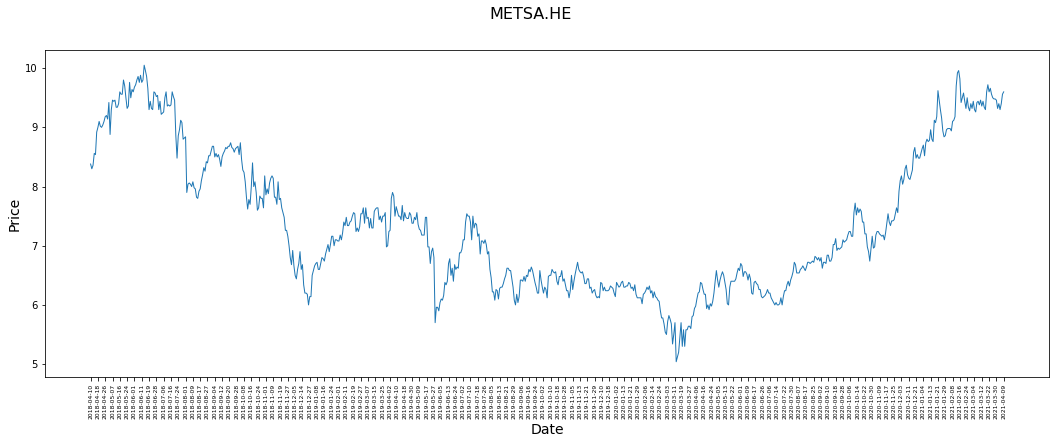

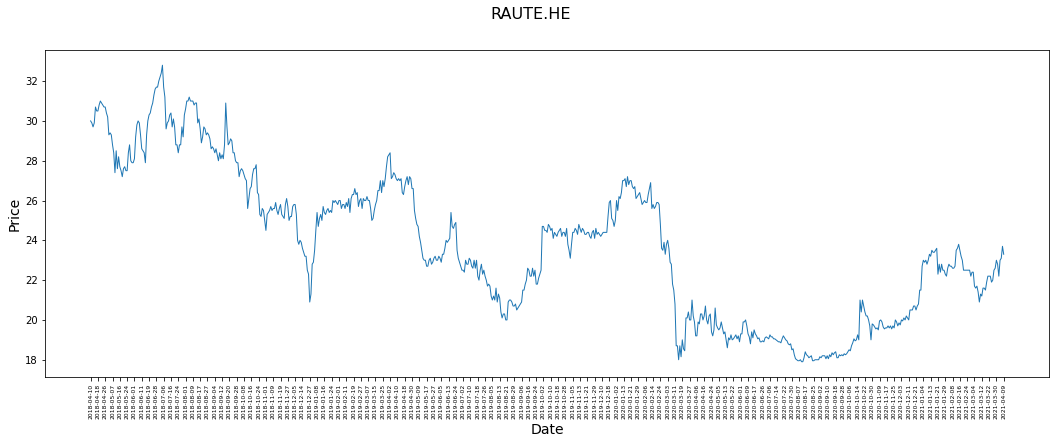

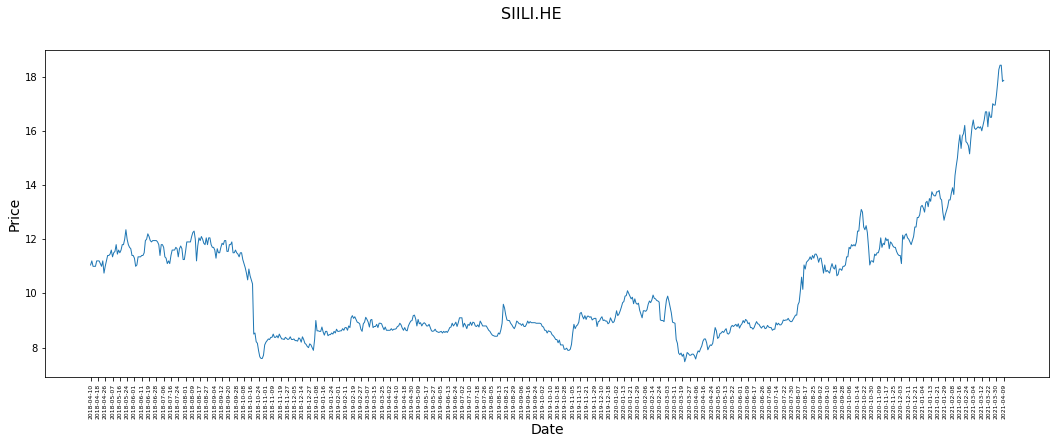

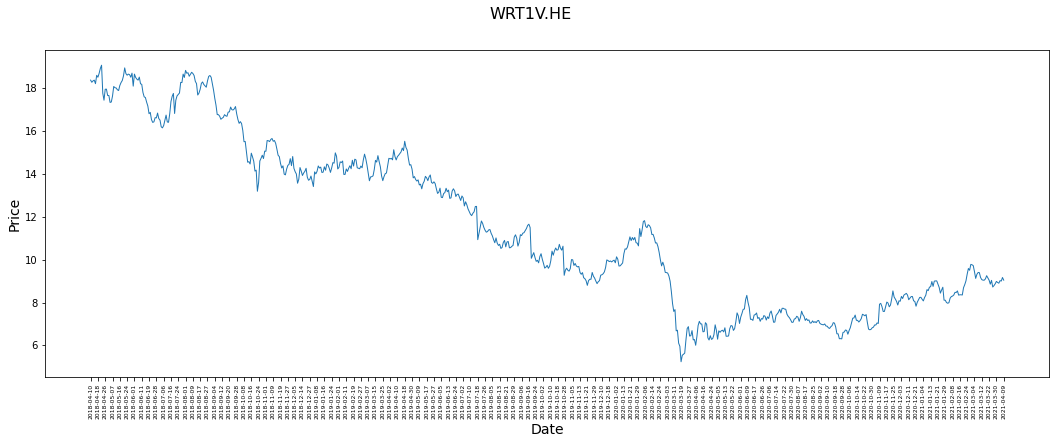

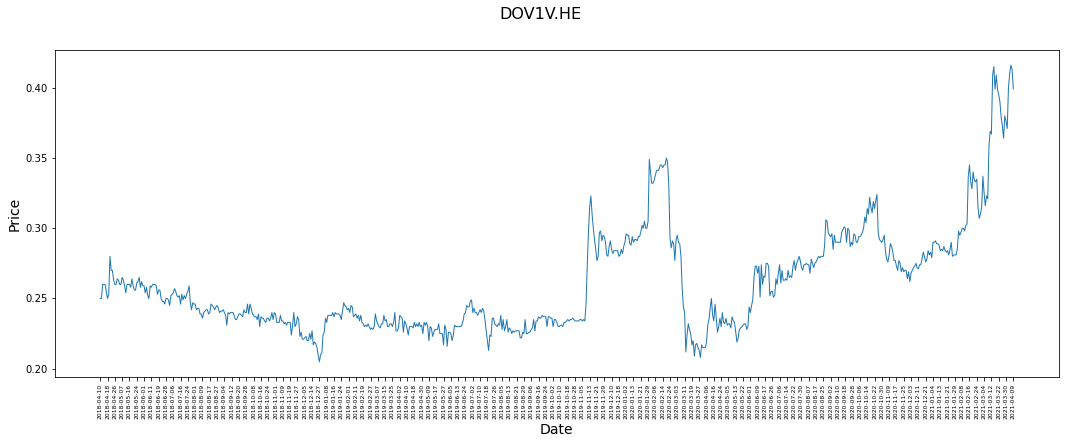

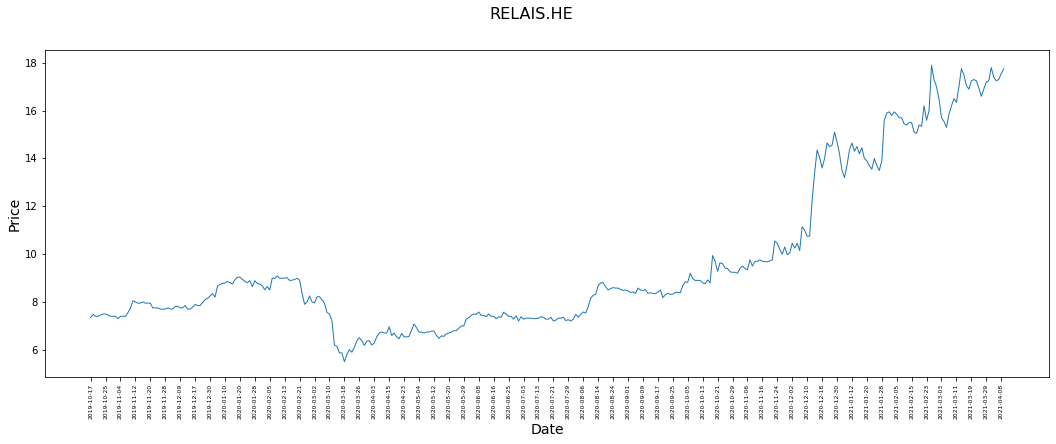

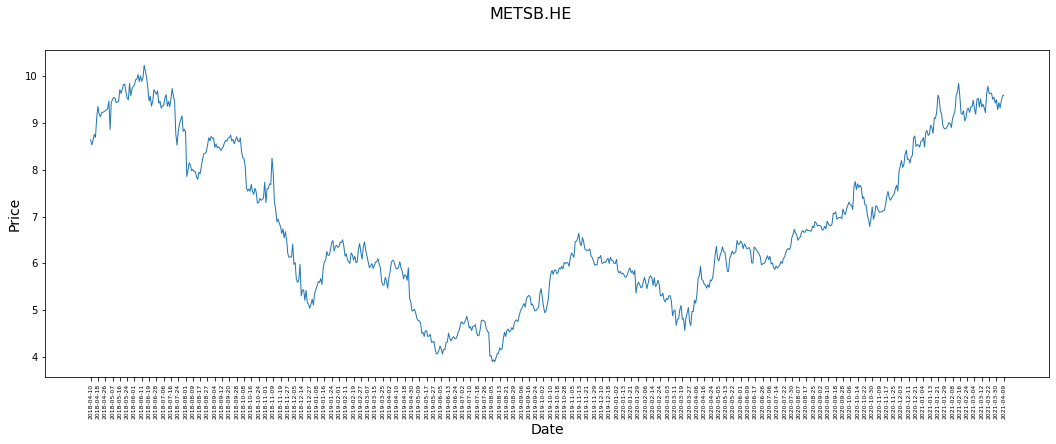

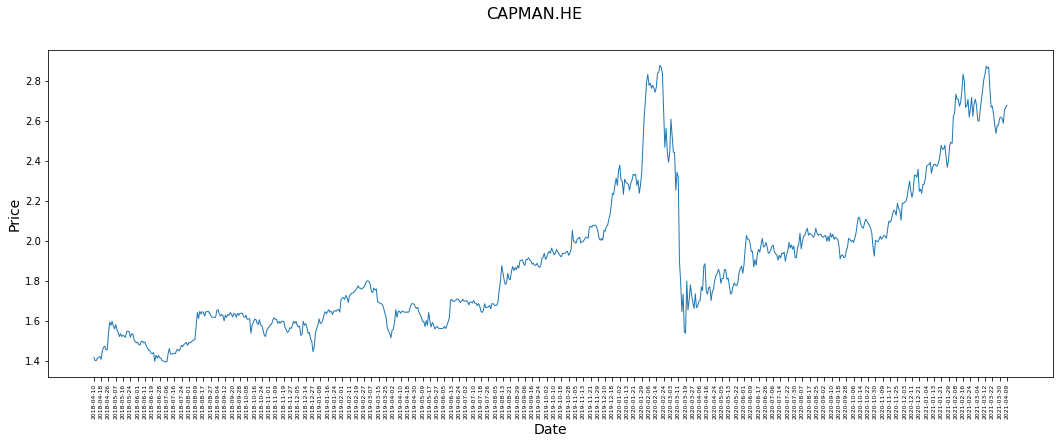

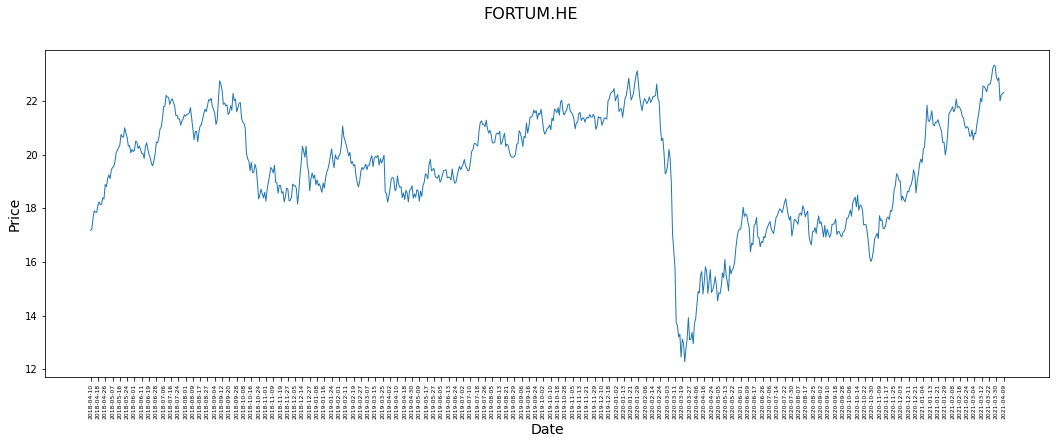

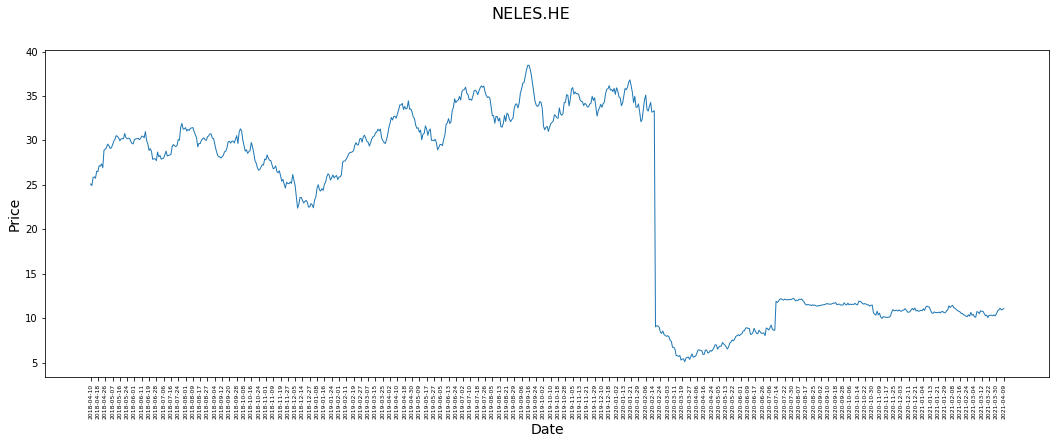

In [14]:
for n in range(len(top_companies)):
    if n != 13:

        plt.figure(figsize=(18,6))
        plt.plot(df_top_companies[n].index, df_top_companies[n].close, label=top_companies[n], linewidth=1)
        plt.xticks(ticks=df_top_companies[n].index[::6], labels=df_top_companies[n].index[::6], fontsize=6, rotation=90)
    #     plt.legend(loc='best')
        plt.xlabel('Date', fontsize=14)
        plt.ylabel('Price', fontsize=14)
        plt.suptitle(top_companies[n], fontsize=16)
        plt.show()

<h1>Time Series Data</h1>

- Rate of return, %-change, Normalization
- CAGR - Compund Annual Growth Rate
- Comparing multiple returns
- Case study - DOW theory

### Rate of return

\begin{equation*}
R = \frac{V_f - V_{init}}{V_{init}} = \frac{V_f}{V_{init}} - 1
\end{equation*}
- $R$: Rate of return
- $V_{init}$: Initial value
- $V_f$: Final value

#### Rate of return

In [15]:
# df_top_companies[0].index = pd.to_datetime(df_top_companies[0].index, infer_datetime_format=True)
# df_top_companies[0]
# monthly_fatalities.date = monthly_fatalities.date.astype(str)

In [16]:

for n in range(len(df_top_companies)):
    df_top_companies[n]['ROR'] = df_top_companies[n]['close'] / df_top_companies[n]['close'].shift() - 1
#     plt.figure(figsize=(18,6))
#     plt.plot(df_top_companies[n].index, df_top_companies[n].ROR, label=top_companies[n])
#     plt.xticks(ticks=df_top_companies[n].index[::6], labels=df_top_companies[n].index[::6], fontsize=12, rotation=65)
# #     plt.legend(loc='best')
#     plt.xlabel('Date', fontsize=14)
#     plt.ylabel('ROR', fontsize=14)
#     plt.suptitle(top_companies[n], fontsize=16)
#     plt.show()
    


### %-change

\begin{equation*}
P_i = \frac{V_i}{V_{i-i}} - 1
\end{equation*}
- $P_i$: Pecentage change value
- $V_i$: Current value
- $V_{i-1}$: Previous value

In [17]:
# Same output as rate of return
# df_top_companies[0]['pctChange'] = df_top_companies[0]['close'].pct_change()
# df_top_companies[0].head()

### Normalization

\begin{equation*}
N_i = \frac{V_i}{V_{init}}*100
\end{equation*}
- $N_i$: Normalized value
- $V_i$: Current value
- $V_{init}$: Initial value

In [18]:
# df_top_companies[0]['norm'] = (df_top_companies[0]['close'] / df_top_companies[0].iloc[0]['close']) * 100
# df_top_companies[0].head()

### Annual Rate of return

In [19]:
# annual_ror = df_top_companies[0].iloc[-1]['close'] / df_top_companies[0].iloc[0]['close'] - 1
# annual_ror

annual_ror_dict = {}
for n in range(len(df_top_companies)):
    annual_ror = df_top_companies[n].iloc[-1]['close'] / df_top_companies[n].iloc[0]['close'] - 1
    annual_ror_dict[top_companies[n]] = annual_ror
df_annual_ror = pd.DataFrame.from_dict(annual_ror_dict, orient='index')

In [20]:
df_annual_ror.columns = ['Annual ROR']
df_annual_ror = df_annual_ror['Annual ROR'].sort_values(ascending=False)
df_annual_ror

REMEDY.HE     6.666667
ADMCM.HE      6.115805
ICP1V.HE      3.389632
REG1V.HE      2.923358
MEKKO.HE      2.628070
VIAFIN.HE     1.594053
RELAIS.HE     1.414966
NESTE.HE      1.413020
GOFORE.HE     1.408027
EQV1V.HE      1.343137
RAP1V.HE      1.259366
KAMUX.HE      1.142424
TITAN.HE      1.093333
UNIAV.HE      0.904412
CAPMAN.HE     0.887324
KNEBV.HE      0.772297
OLVAS.HE      0.755396
SCANFL.HE     0.728070
ACG1V.HE      0.688525
SIILI.HE      0.616290
DOV1V.HE      0.596000
VAIAS.HE      0.543529
ROVIO.HE      0.434283
VINCIT.HE     0.422535
UPONOR.HE     0.416426
DETEC.HE      0.413333
ORNBV.HE      0.403670
ALTIA.HE      0.370000
ORNAV.HE      0.315315
ENENTO.HE     0.305147
FORTUM.HE     0.298981
RAIVV.HE      0.159501
RAIKV.HE      0.158774
METSA.HE      0.145585
BITTI.HE      0.125418
METSB.HE      0.110468
FSKRS.HE      0.097137
SSABBH.HE     0.082920
UPM.HE        0.081323
KELAS.HE      0.002252
APETIT.HE    -0.036496
PARTNE1.HE   -0.044534
TYRES.HE     -0.106021
LAT1V.HE   

In [21]:
focus = df_annual_ror.tail(19)
focus.to_csv('results/focus.csv')

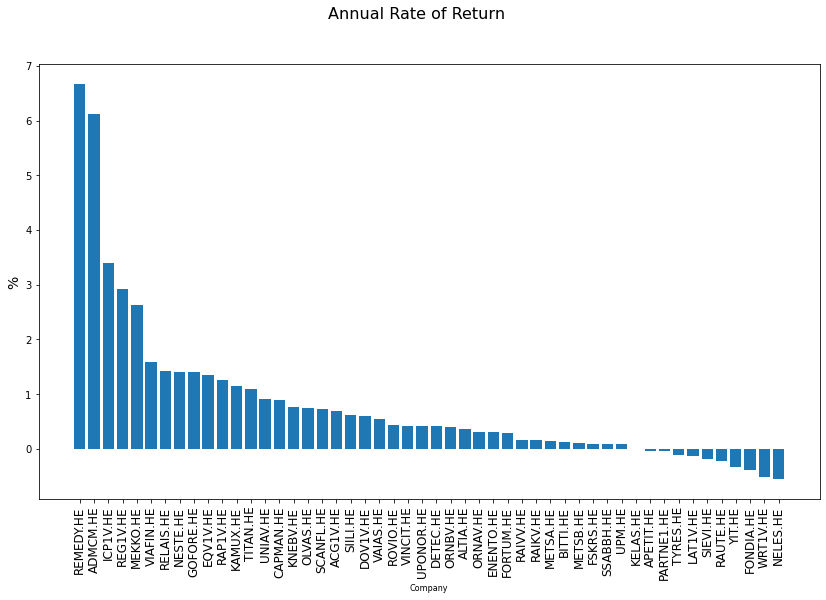

In [22]:
plt.figure(figsize=(14,8))
plt.bar(df_annual_ror.index, df_annual_ror)
plt.xticks(ticks=df_annual_ror.index, fontsize=12, rotation=90)
plt.xlabel('Company', fontsize=8)
plt.ylabel('%', fontsize=14)
plt.suptitle('Annual Rate of Return', fontsize=16)
plt.show()


In [23]:
df_top_companies[0]['Growth'] = df_top_companies[0]['ROR'] + 1
df_top_companies[0]

,date,high,low,open,close,volume,adjclose,ROR,Growth
formatted_date,,,,,,,,,
2018-04-10,1523343600,4.880,4.783,4.801,4.877,619064,4.536303,NaN,NaN
2018-04-11,1523430000,4.908,4.834,4.870,4.850,182531,4.511189,-0.005536,0.994464
2018-04-12,1523516400,4.850,4.730,4.846,4.748,115481,4.416315,-0.021031,0.978969
2018-04-13,1523602800,4.794,4.685,4.700,4.749,781811,4.417245,0.000211,1.000211
2018-04-16,1523862000,4.946,4.702,4.800,4.840,202574,4.501888,0.019162,1.019162
2018-04-17,1523948400,4.980,4.801,4.850,4.971,135326,4.711345,0.027066,1.027066
2018-04-18,1524034800,5.050,4.950,5.050,5.000,33077,4.738830,0.005834,1.005834
2018-04-19,1524121200,5.088,4.927,5.000,4.982,104128,4.721770,-0.003600,0.996400
2018-04-20,1524207600,5.078,4.960,5.012,5.012,116552,4.750203,0.006022,1.006022


### Annual Rate of Return Growth

In [24]:
# df_top_companies[0]['Growth'].prod() - 1

In [25]:
# Calculate current prize
df_top_companies[0].iloc[0]['close'] * df_top_companies[0]['Growth'].prod()

6.994999885559094

In [26]:
# Current prize
df_top_companies[0].iloc[-1]['close']

6.994999885559082

### CAGR calculation

\begin{equation*}
CAGR = \bigg(\frac{V_f}{V_{init}}\bigg)^{1/n} - 1
\end{equation*}
- $V_{init}$: Initial value
- $V_f$: Final value
- $n$: number of period

In [27]:
days = len(df_top_companies[0])
days

751

In [28]:
annual_cagr_dict = {}
for n in range(len(df_top_companies)):
    # Average daily return, Stock price daily change / day
    cagr = (df_top_companies[n].iloc[-1]['close'] / df_top_companies[n].iloc[0]['close']) ** (1 / days) - 1
    # Annual CAGR
    annual_cagr = (1 + cagr) ** (days)
    annual_cagr_dict[top_companies[n]] = annual_cagr
df_annual_cagr = pd.DataFrame.from_dict(annual_cagr_dict, orient='index')

In [29]:
df_annual_cagr.columns = ['Annual CAGR']
df_annual_cagr = df_annual_cagr['Annual CAGR'].sort_values()
df_annual_cagr

NELES.HE      0.442032
WRT1V.HE      0.492350
FONDIA.HE     0.621488
YIT.HE        0.669733
RAUTE.HE      0.776667
SIEVI.HE      0.813953
LAT1V.HE      0.874092
TYRES.HE      0.893979
PARTNE1.HE    0.955466
APETIT.HE     0.963504
KELAS.HE      1.002252
UPM.HE        1.081323
SSABBH.HE     1.082920
FSKRS.HE      1.097137
METSB.HE      1.110468
BITTI.HE      1.125418
METSA.HE      1.145585
RAIKV.HE      1.158774
RAIVV.HE      1.159501
FORTUM.HE     1.298981
ENENTO.HE     1.305147
ORNAV.HE      1.315315
ALTIA.HE      1.370000
ORNBV.HE      1.403670
DETEC.HE      1.413333
UPONOR.HE     1.416426
VINCIT.HE     1.422535
ROVIO.HE      1.434283
VAIAS.HE      1.543529
DOV1V.HE      1.596000
SIILI.HE      1.616290
ACG1V.HE      1.688525
SCANFL.HE     1.728070
OLVAS.HE      1.755396
KNEBV.HE      1.772297
CAPMAN.HE     1.887324
UNIAV.HE      1.904412
TITAN.HE      2.093333
KAMUX.HE      2.142424
RAP1V.HE      2.259366
EQV1V.HE      2.343137
GOFORE.HE     2.408027
NESTE.HE      2.413020
RELAIS.HE  

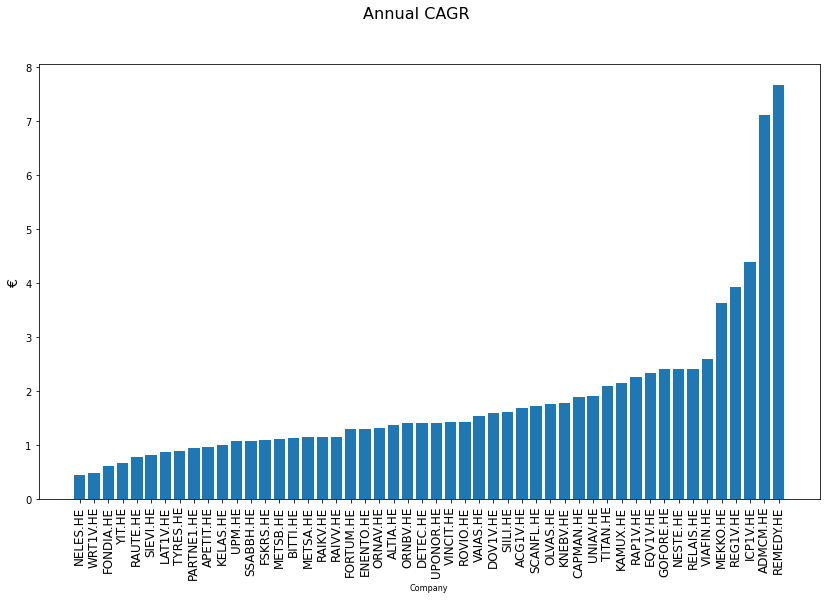

In [30]:
plt.figure(figsize=(14,8))
plt.bar(df_annual_cagr.index, df_annual_cagr)
plt.xticks(ticks=df_annual_cagr.index, fontsize=12, rotation=90)
plt.xlabel('Company', fontsize=8)
plt.ylabel('€', fontsize=14)
plt.suptitle('Annual CAGR', fontsize=16)
plt.show()
